In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

%matplotlib inline

## Problem 1

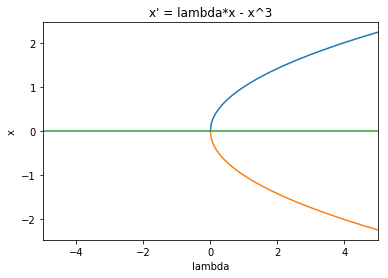

In [11]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, np.array(X)

def F(x, lmbda):
    return x*lmbda - x**3

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(0, 5, 200)[::-1], np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(0, 5, 200)[::-1], -np.sqrt(5), F)
# The middle curve
C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200), 0, F)

plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.xlabel('lambda')
plt.ylabel('x')
plt.title(r"x' = lambda*x - x^3")
plt.xlim(-5,5)
plt.show()

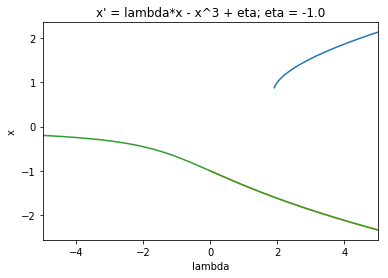

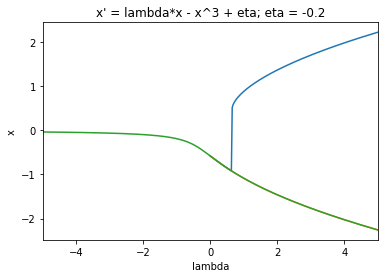

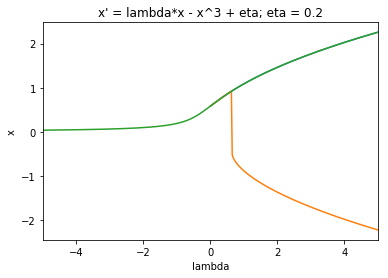

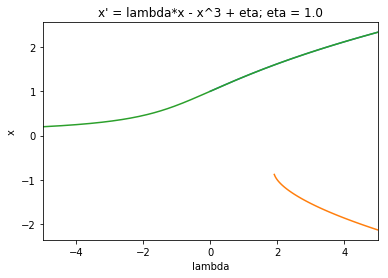

In [12]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, np.array(X)

for eta in [-1., -.2, .2, 1.]:
    def F(x, lmbda):
        return x*lmbda - x**3 + eta

    # Top curve shown in the bifurcation diagram
    C1, X1 = EmbeddingAlg(np.linspace(0, 5, 200)[::-1], np.sqrt(5), F)
    # The bottom curve
    C2, X2 = EmbeddingAlg(np.linspace(0, 5, 200)[::-1], -np.sqrt(5), F)
    # The middle curve
    C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200), 0, F)

    plt.plot(C1, X1)
    plt.plot(C2, X2)
    plt.plot(C3, X3)
    plt.xlabel('lambda')
    plt.ylabel('x')
    plt.title(r"x' = lambda*x - x^3 + eta; eta = {}".format(eta))
    plt.xlim(-5,5)
    plt.show()